![rocket banner](images/space-mission.png "Space mission launches banner")

### Exploratory Data Analysis: `SPACE MISSION LAUNCHES`

<hr style="border:2px solid gray">

#### Install packages and libraries needed

In [ ]:
#pip install pandasql
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn
#pip zipfile
#pip sqlalchemy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
#import kaggle
import datetime

from sqlalchemy import engine
from pandasql import sqldf

pysqldf = lambda query: sqldf(query, globals())

#### Downloading dataset from Kaggle

In [ ]:
!kaggle datasets download -d sefercanapaydn/mission-launches

mission-launches.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzip files
zipfile_name = 'mission-launches.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

#### Load data into a dataframe

In [ ]:
df_mission = pd.read_csv('mission_launches.csv')
display(df_mission.head())
print("Rows x Columns: ", df_mission.shape)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Rows x Columns:  (4324, 9)


#### List of columns

In [ ]:
list(df_mission.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'Organisation',
 'Location',
 'Date',
 'Detail',
 'Rocket_Status',
 'Price',
 'Mission_Status']

In [ ]:
df_mission.rename(columns={"Organisation": "Organization"}, inplace=True)

#### Types in dataset

In [ ]:
df_mission.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organization      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

_Organization_, _Location_, _Detail_, _Rocket_Status_ and _Mission_Status_ should be of type 'string', however they are of type 'object'. <br> <br> 
_Date_ should be of type 'datetime' and _Price_ should be 'float'.
Let's going to convert them to appropiate type.

In [ ]:
df_mission['Organization'] = df_mission['Organization'].astype('string')
df_mission['Location'] = df_mission['Location'].astype('string')
df_mission['Detail'] = df_mission['Detail'].astype('string')
df_mission['Rocket_Status'] = df_mission['Rocket_Status'].astype('string')
df_mission['Mission_Status'] = df_mission['Mission_Status'].astype('string')
df_mission.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
Organization      string[python]
Location          string[python]
Date                      object
Detail            string[python]
Rocket_Status     string[python]
Price                     object
Mission_Status    string[python]
dtype: object

In [ ]:
df_mission['Date'] = pd.to_datetime(df_mission['Date'], infer_datetime_format=True, errors='coerce')

df_mission['Date'].dtype
df_mission['Date']

/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_18539/199377942.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mission['Date'] = pd.to_datetime(df_mission['Date'], infer_datetime_format=True, errors='coerce')


0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [ ]:
#price_years = df_mission[['Year', 'Price']]
df_mission['Price'] = pd.to_numeric(df_mission['Price'], errors='coerce')
df_mission['Price'].dtype

dtype('float64')

#### Columns with null values

In [ ]:
df_mission.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organization         0
Location             0
Date               126
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

'Price' and 'Date' column have null values.

#### Drop columns that we won't use: _'Unnamed: 0.1'_	and _'Unnamed: 0'_

In [ ]:
df_mission[['Unnamed: 0.1', 'Unnamed: 0']]

,Unnamed: 0.1,Unnamed: 0
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
4319,4319,4319
4320,4320,4320
4321,4321,4321
4322,4322,4322


This values are unuseful, so we are going to delete them.

In [ ]:
df_mission.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) # or mission.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
print('Rows x Columns: ', df_mission.shape) #Should be: (4324, 7)

Rows x Columns:  (4324, 7)


#### Statistics about numerical columns


In [ ]:
df_mission.describe()

,Price,Year
count,949.000000,4198.000000
mean,129.795237,1987.455693
std,143.220323,18.085370
min,5.300000,1957.000000
25%,40.000000,1972.000000
50%,62.000000,1985.000000
75%,164.000000,2002.000000
max,450.000000,2020.000000


#### Statistics about string columns

In [ ]:
df_mission.describe(include='string')

,Organization,Location,Detail,Rocket_Status,Mission_Status
count,4324,4324,4324,4324,4324
unique,56,137,4278,2,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,Success
freq,1777,235,6,3534,3879


#### Count duplicated values

In [ ]:
print ("Duplicate values: ", df_mission.duplicated().sum())


Duplicate values:  12


#### Unique values per column

In [ ]:
for col in df_mission.columns:
    unique_count = df_mission[col].nunique()
    print (col + ' has ' + str(unique_count) + ' unique values')

Organization has 56 unique values
Location has 137 unique values
Date has 4194 unique values
Detail has 4278 unique values
Rocket_Status has 2 unique values
Price has 56 unique values
Mission_Status has 4 unique values


#### Unique values _Mission_Status_ and _Rocket_Status_

In [ ]:
print ("Unique values of Rocket_Status: ", list(df_mission.Rocket_Status.unique()))
print ("Unique values of Mission Status: ",list(df_mission.Mission_Status.unique()) )

Unique values of Rocket_Status:  ['StatusActive', 'StatusRetired']
Unique values of Mission Status:  ['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']


#### Create a new column: _Year_

In [ ]:
df_mission['Year'] = df_mission.Date.dt.year
df_mission.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020.0


In [ ]:
df_mission.tail()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957.0
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,1957.0


<hr style="border:2px solid gray">

#### EDA - Exploratory Data Analysis

1. Who launched the most missions in any given year?

In [ ]:
query = """
Select Year, Organization, count(Organization) as launches
from df_mission
group by Year, Organization
order by launches desc
"""
results = pysqldf(query)
results

,Year,Organization,launches
0,1976.0,RVSN USSR,93
1,1977.0,RVSN USSR,92
2,1971.0,RVSN USSR,90
3,1975.0,RVSN USSR,88
4,1970.0,RVSN USSR,86
...,...,...,...
646,2020.0,IAI,1
647,2020.0,IRGC,1
648,2020.0,ISA,1
649,2020.0,JAXA,1


2. How has the cost of a space mission varied over time?

In [ ]:
query = """
Select Year, count(Year) as Launches, sum(Price) as TotalPerYear, sum(Price)/count(Year) as Avg
from df_mission
group by Year
"""
results = pysqldf(query)
results

,Year,Launches,TotalPerYear,Avg
0,NaN,0,168.30,NaN
1,1957.0,3,NaN,NaN
2,1958.0,22,NaN,NaN
3,1959.0,20,NaN,NaN
4,1960.0,38,NaN,NaN
...,...,...,...,...
60,2016.0,88,5085.27,57.787159
61,2017.0,90,4586.41,50.960111
62,2018.0,117,5697.98,48.700684
63,2019.0,107,4351.51,40.668318


/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning

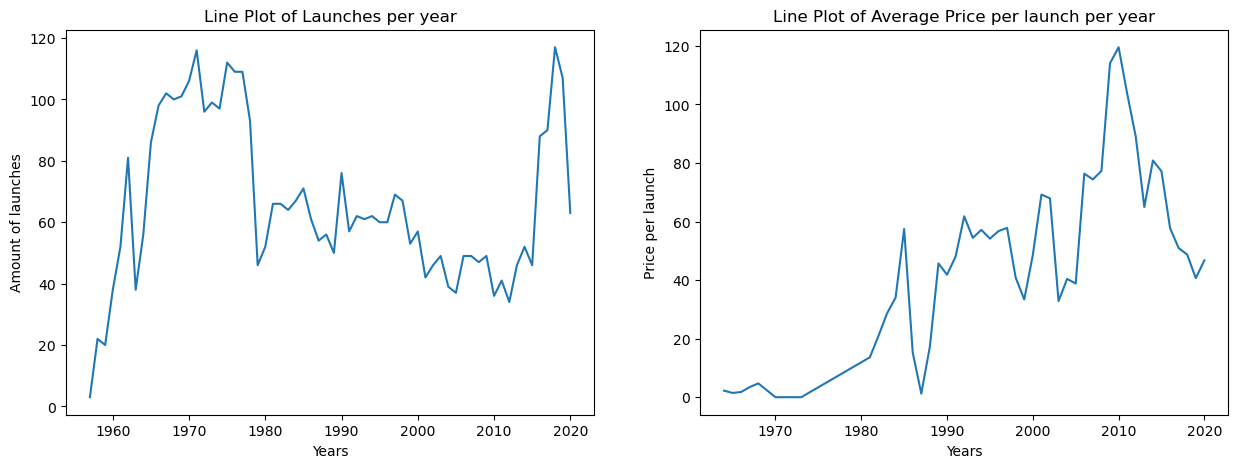

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: 
sns.lineplot(data=results, x='Year', y='Launches', ax=axes[0])
axes[0].set_title('Line Plot of Launches per year')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Amount of launches')

# Subplot 2:
sns.lineplot(data=results, x='Year', y='Avg', ax=axes[1])
axes[1].set_title ('Line Plot of Average Price per launch per year')
axes[1].set_ylabel('Price per launch')
axes[1].set_xlabel('Years')

plt.show()

3. Which months are the most popular for launches?

In [ ]:
query = """
select Date, strftime('%m', Date) as month
from df_mission
"""

months = pysqldf(query)
months = months.sort_values(by='month', ascending=True)

In [ ]:
popular_months = months.month.value_counts()
popular_months

month
12    430
06    386
10    375
04    366
08    358
09    354
03    349
07    347
11    325
02    323
05    320
01    265
Name: count, dtype: int64

/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_18539/144689668.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=months, x='month', shrink=.8, palette='bright')
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


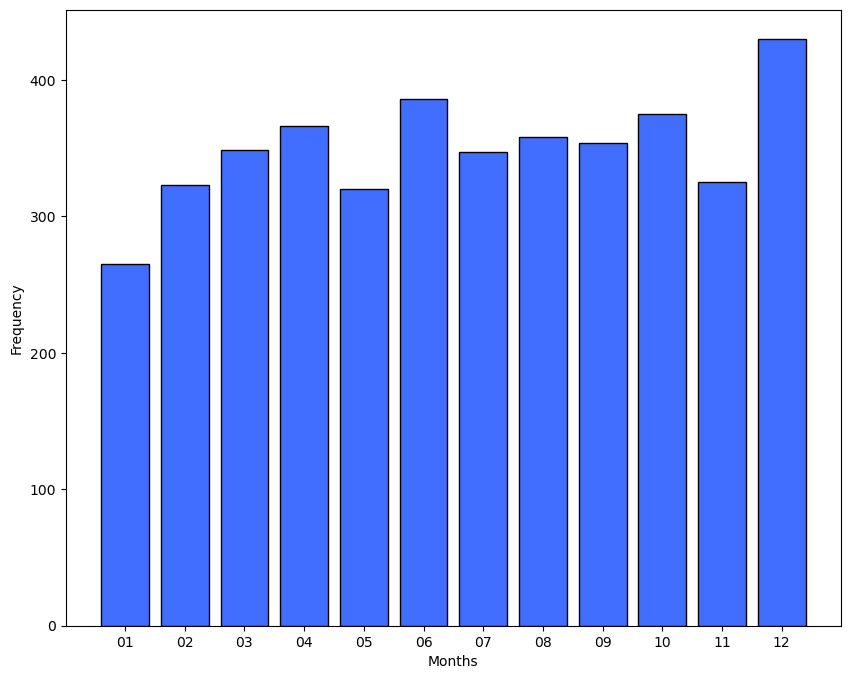

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=months, x='month', shrink=.8, palette='bright')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

4. Have space missions gotten safer or has the chance of failure remained unchanged? <br>
¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

In [ ]:
query = """
select Year, Mission_Status, count(Mission_Status) as amount
from df_mission
group by Year, Mission_Status 
"""

count_mission_status = sqldf(query)
count_mission_status

,Year,Mission_Status,amount
0,NaN,Failure,39
1,NaN,Prelaunch Failure,2
2,NaN,Success,85
3,1957.0,Failure,1
4,1957.0,Success,2
...,...,...,...
173,2019.0,Failure,5
174,2019.0,Partial Failure,2
175,2019.0,Success,100
176,2020.0,Failure,6


There is 39 missions that Failed, 85 that were succesful, and 2 that failed before launch that do not have an assigned year.

In [ ]:
query = """
select Year, Mission_Status, count(Mission_Status) as amount
from df_mission
where Mission_Status == 'Success'
group by Year
"""
success = sqldf(query)
success

,Year,Mission_Status,amount
0,NaN,Success,85
1,1957.0,Success,2
2,1958.0,Success,6
3,1959.0,Success,8
4,1960.0,Success,19
...,...,...,...
60,2016.0,Success,84
61,2017.0,Success,83
62,2018.0,Success,113
63,2019.0,Success,100


In [ ]:
query = '''
select Year, count(Year) as total
from df_mission
group by Year
'''
res2 = sqldf(query)
success['total'] = res2['total'].values
success

,Year,Mission_Status,amount,total
0,NaN,Success,85,0
1,1957.0,Success,2,3
2,1958.0,Success,6,22
3,1959.0,Success,8,20
4,1960.0,Success,19,38
...,...,...,...,...
60,2016.0,Success,84,88
61,2017.0,Success,83,90
62,2018.0,Success,113,117
63,2019.0,Success,100,107


In [ ]:
success['percent'] = success['amount']*100/success['total']


/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '% Success Launches')

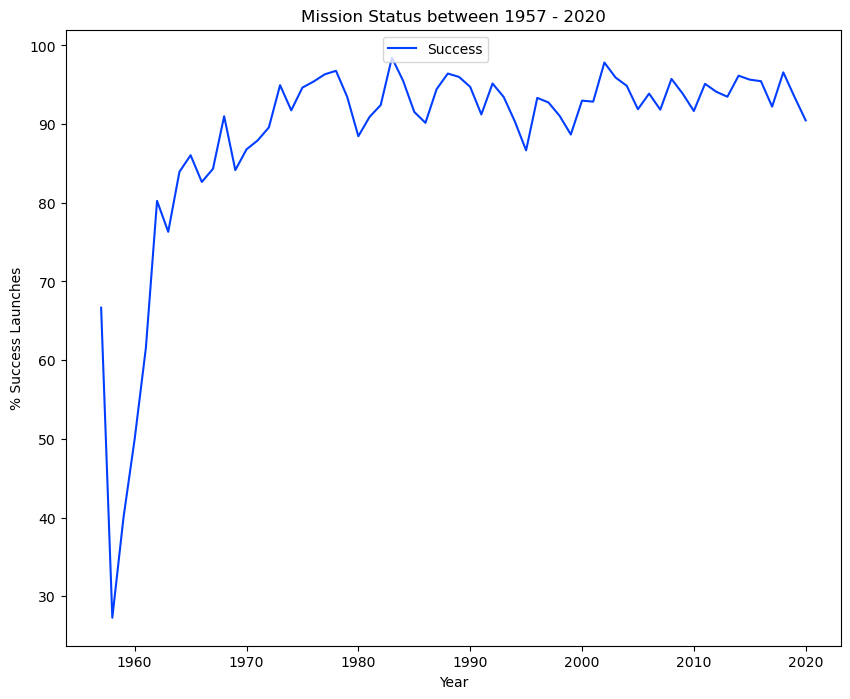

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=ress, x='Year', y='percent', hue='Mission_Status')#, size="amount")#, style='Mission_Status')
sns.move_legend(ax, "upper left", bbox_to_anchor=(.4, 1), ncol=2, title=None, frameon=True )
plt.title('Mission Status between 1957 - 2020')
plt.ylabel('% Success Launches')